In [82]:
from astropy.table import Table
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename, splitext
from mpl_toolkits.axes_grid1 import ImageGrid

In [8]:
%matplotlib inline

In [9]:
from astropy import visualization

In [10]:
#directory='/Volumes/fergusonUSB190118/dsii_dwarfs/'
directory="/Users/hcferguson/data/dsii_dwarfs/"

In [11]:
bands=['g','r','i','z','y']

In [13]:
t = Table.read(directory+'stamps2.ecsv')
t[:2]

<Table length=2>
                      filename                      logmass ... noise_z noise_y
                       str52                        float64 ... float64 float64
--------------------------------------------------- ------- ... ------- -------
stamps2/d0.74_m6.22_re0.39_feh-1.8_age10.0_HSC.fits  6.2191 ...  0.0275  0.0381
stamps2/d0.84_m5.09_re0.11_feh-2.0_age10.8_HSC.fits  5.0878 ...  0.0202  0.0301

In [110]:
def get_example(t,dist,logmass,age,feh=None,tol=np.array([0.05,0.1,1.0,0.5])):
    while True:
        dselect = (t['distance'] > dist-tol[0]) & (t['distance'] <= dist+tol[0])
        mselect = (t['logmass'] > logmass-tol[1]) & (t['logmass'] <= logmass+tol[1])
        aselect = (t['age'] > age-tol[2]) & (t['age'] <= age+tol[2])
        if feh:
            fehselect = (t['FeH'] > feh-tol[3]) & (t['FeH'] <= feh+tol[3])
            rows = t[dselect & mselect & aselect & fehselect]
        else:
            rows = t[dselect & mselect & aselect]
        if len(rows) >0:
            break
        else:
            tol = 1.1*tol
    return rows[0]

In [131]:
row = get_example(t,5.,6.,12.)
row

<Row index=0>
                      filename                      logmass distance  rekpc  rearcsec   FeH     age    ellip     pa    scale  oversamp                      isofile                       gamma_g gamma_r gamma_i gamma_z gamma_y noise_g noise_r noise_i noise_z noise_y
                       str52                        float64 float64  float64 float64  float64 float64 float64 float64 float64  int32                         str50                        float64 float64 float64 float64 float64 float64 float64 float64 float64 float64
--------------------------------------------------- ------- -------- ------- -------- ------- ------- ------- ------- ------- -------- -------------------------------------------------- ------- ------- ------- ------- ------- ------- ------- ------- ------- -------
stamps2/d4.95_m5.95_re0.39_feh-2.0_age12.3_HSC.fits  5.9517   4.9517  0.3887  16.2270 -2.0000 12.3426  0.0513  2.2344  0.0336     1280 MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd 15.3939 17.9194  7.3690 18.0307 10.8223  0.0334  0.0299  0.0386  0.0309  0.0325

In [68]:
def open_img(row,directory=directory):
    img = fits.getdata(directory+row['filename'])
    return img

In [83]:
def imscl(img,pmin=0,pmax=99.):
    plt.imshow(img,vmin=np.percentile(img,pmin),vmax=np.percentile(img,pmax))
def imsh(img):
    plt.imshow(img,vmin=-0.01,vmax=1)
def rgb(r,g,b,outfile='foo.jpg',minimum=np.array([-0.1,-0.1,-0.1]),stretch=1.,q=10.):
    rgbimg = visualization.make_lupton_rgb(r,g,b,minimum,stretch,q)
    return rgbimg

In [80]:
img = open_img(row)
for i,b in enumerate(bands):
    print("%s %7.3f %7.3f" % (b, np.percentile(img[i,:,:],0.01),np.percentile(img[i,:,:],99.99)))

g  -0.127   0.138
r  -0.067   0.131
i  -0.066   0.157
z  -0.083   0.159
y  -0.078   0.153


In [81]:
foo = rgb(img[4,:,:],img[2,:,:],img[0,:,:],stretch=0.2,q=10.)
plt.imshow(foo)

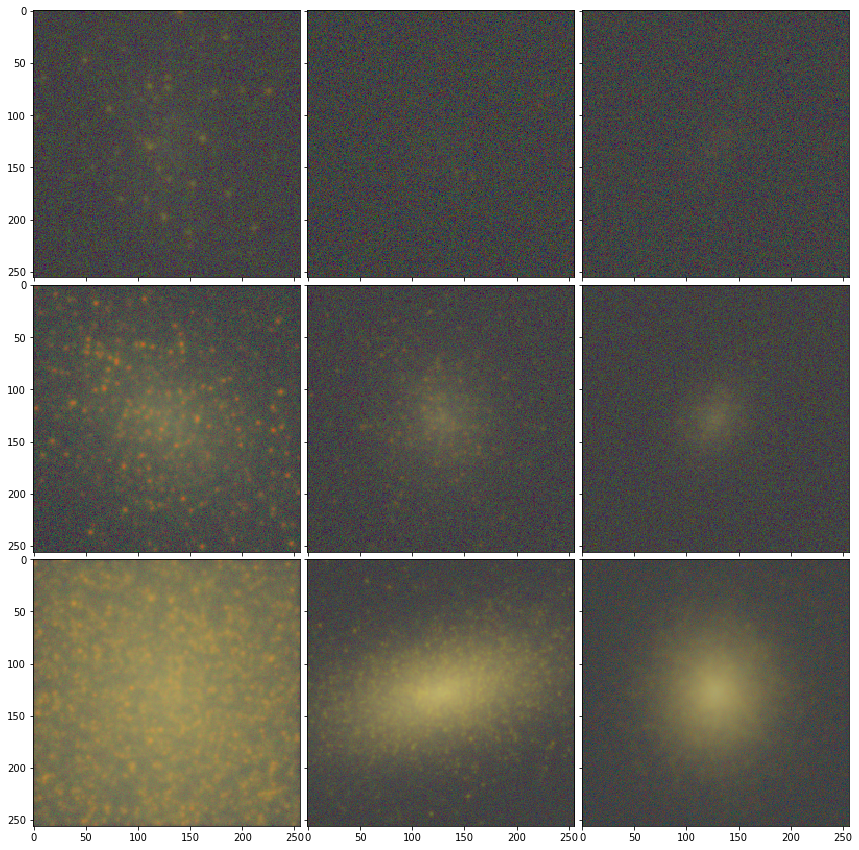

In [97]:
# Vary distance and mass
fig = plt.figure(1, (15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
i = 0
for m in [5.5,6.5,7.5]:
    for d in [5,10,15]:
        row = get_example(t,d,m,12.)
        img = open_img(row)
        rgbimg = rgb(img[4,:,:],img[2,:,:],img[0,:,:],stretch=0.2,q=10.)
        grid[i].imshow(rgbimg)  # The AxesGrid object work as a list of axes.
        #grid[i].title("D,logM* = %.0f %.1f",(d,m))
        i = i+1
plt.show()

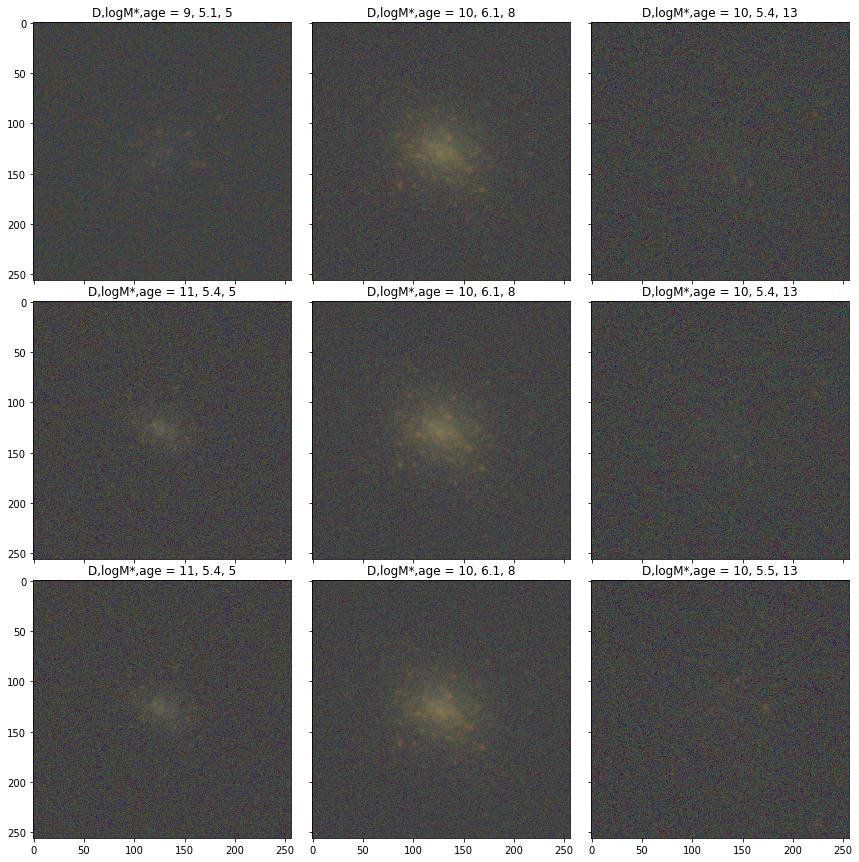

In [139]:
# Vary age and feh
fig = plt.figure(1, (15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
                 )
i = 0
m = 6.
for d in [10,10.5,11]:
    for age in [5,8,13]:
        row = get_example(t,d,m,age,tol=np.array([1,1,0.2,0.5]))
        img = open_img(row)
        rgbimg = rgb(img[4,:,:],img[2,:,:],img[0,:,:],stretch=0.2,q=10.)
        grid[i].imshow(rgbimg)  # The AxesGrid object work as a list of axes.
        grid[i].set_title("D,logM*,age = %.0f, %.1f, %.0f" % (
            row['distance'],row['logmass'],row['age']))
        i = i+1
plt.show()

In [5]:
help(visualization.lupton_rgb)

Help on module astropy.visualization.lupton_rgb in astropy.visualization:

NAME
    astropy.visualization.lupton_rgb - Combine 3 images to produce a properly-scaled RGB image following Lupton et al. (2004).

DESCRIPTION
    The three images must be aligned and have the same pixel scale and size.
    
    For details, see : http://adsabs.harvard.edu/abs/2004PASP..116..133L

FUNCTIONS
    make_lupton_rgb(image_r, image_g, image_b, minimum=0, stretch=5, Q=8, filename=None)
        Return a Red/Green/Blue color image from up to 3 images using an asinh stretch.
        The input images can be int or float, and in any range or bit-depth.
        
        For a more detailed look at the use of this method, see the document
        :ref:`astropy-visualization-rgb`.
        
        Parameters
        ----------
        
        image_r : `~numpy.ndarray`
            Image to map to red.
        image_g : `~numpy.ndarray`
            Image to map to green.
        image_b : `~numpy.ndarray`
   

In [113]:
help(basename)

Help on function basename in module posixpath:

basename(p)
    Returns the final component of a pathname



In [114]:
from os import path

In [117]:
path.splitext(basename(row['filename']))[0]

'd4.97_m5.04_re0.33_feh-1.8_age12.9_HSC'